In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
print("Number of samples",lfw_dataset.data.shape[0])
print("Number of features",lfw_dataset.data.shape[1])
print("Number of classes",lfw_dataset.target_names)

Number of samples 1140
Number of features 2914
Number of classes ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [3]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.65973071
Validation score: 0.487500
Iteration 2, loss = 1.17095056
Validation score: 0.550000
Iteration 3, loss = 0.92399542
Validation score: 0.575000
Iteration 4, loss = 0.74242422
Validation score: 0.650000
Iteration 5, loss = 0.58997495
Validation score: 0.687500
Iteration 6, loss = 0.47010548
Validation score: 0.712500
Iteration 7, loss = 0.38238218
Validation score: 0.712500
Iteration 8, loss = 0.31424310
Validation score: 0.750000
Iteration 9, loss = 0.26052928
Validation score: 0.762500
Iteration 10, loss = 0.21943104
Validation score: 0.762500
Iteration 11, loss = 0.18659283
Validation score: 0.762500
Iteration 12, loss = 0.15998467
Validation score: 0.775000
Iteration 13, loss = 0.13828518
Validation score: 0.812500
Iteration 14, loss = 0.11910002
Validation score: 0.800000
Iteration 15, loss = 0.10380035
Validation score: 0.800000
Iteration 16, loss = 0.09075941
Validation score: 0.812500
Iteration 17, loss = 0

In [4]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.87      0.90      0.88        59
  Donald Rumsfeld       0.89      0.52      0.65        33
    George W Bush       0.85      0.96      0.90       172
Gerhard Schroeder       0.82      0.66      0.73        35
       Tony Blair       0.79      0.72      0.76        43

         accuracy                           0.85       342
        macro avg       0.85      0.75      0.78       342
     weighted avg       0.85      0.85      0.84       342



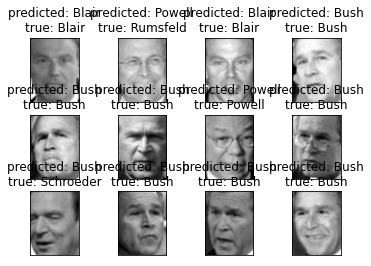

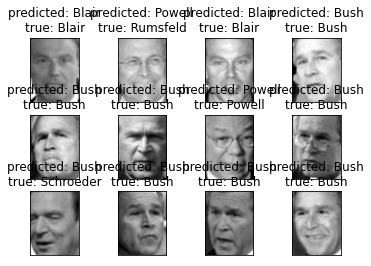

In [6]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)